Trying to analyze what I look for in jobs

https://stackoverflow.com/questions/10377998/how-can-i-iterate-over-files-in-a-given-directory

https://www.analyticsvidhya.com/blog/2017/03/read-commonly-used-formats-using-python/

In [4]:
#!pip install docx2txt
#!pip install wordfreq

In [1]:
import glob
import docx2txt
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer

"""https://pypi.org/project/wordfreq/
"""

'https://pypi.org/project/wordfreq/\n'

# Load in Saved Job Post Text

In [2]:
for filepath in glob.iglob('./Data/job_descriptions/*'):
    print('   ', filepath)

    ./Data/job_descriptions\Analytic Insights - PWC.docx
    ./Data/job_descriptions\BI Analyst - Indeed.docx
    ./Data/job_descriptions\BI Analyst Engineer - HT Group.docx
    ./Data/job_descriptions\BI Developer - GTS Technology Solutions.docx
    ./Data/job_descriptions\Data Analyst - Pulselight.docx
    ./Data/job_descriptions\Data Analyst - Square Root.docx
    ./Data/job_descriptions\Data Scientist - NIC.docx
    ./Data/job_descriptions\Data Scientist - Sense Corp.docx
    ./Data/job_descriptions\Digital Analyst - Pivotal Analytics.docx
    ./Data/job_descriptions\Marketing Analyst - Modernize.docx
    ./Data/job_descriptions\Marketing Data Analyst - Yeti.docx
    ./Data/job_descriptions\Senior BI analyst - OJO Labs.docx
    ./Data/job_descriptions\Senior Data Analyst - WP Engine.docx
    ./Data/job_descriptions\Senior Data Insights Analyst - HomeAway.docx
    ./Data/job_descriptions\Senior Financial Analyst, Marketing - Endurance International Group.docx
    ./Data/job_descript

In [3]:
text = docx2txt.process("./Data/job_descriptions\Team lead data and reporting prime - indeed.docx")

In [4]:
text

"Team Lead, Data & Reporting- Prime\n\nIndeed\n\n\n\n353 reviews\n\n\n\n-\n\nAustin, TX 78731\n\nOur mission:\nAs the world’s number 1 job site, our mission is to help people get jobs. We need talented, passionate people working together to make this happen. We are looking to grow our teams with people who share our energy and enthusiasm for creating the best experience for job seekers.\xa0\n\nThe team:\nWe are a rapidly growing and focused product team building the most popular job site on the planet. Every month, over 200 million people count on Indeed to help them find jobs, make it easy to apply, research companies, and connect qualified candidates to their job openings. With product teams in Austin, Tokyo, Seattle, San Francisco, Singapore and Hyderabad, we are improving people's lives all around the world, one job at a time.\xa0\n\nYour job:\nThe Data & Reporting Lead is a part of the Business Operations team focusing on Indeed Prime. Indeed Prime is a job seeker marketplace that

In [5]:
docs_dict = {}
for filepath in glob.iglob('./Data/job_descriptions/*'):
    try: 
        docs_dict[filepath] =  docx2txt.process(filepath)
    except: 
        print('   bad file: ', filepath)

   bad file:  ./Data/job_descriptions\Marketing Data Analyst - Yeti.docx


In [6]:
df = pd.DataFrame(docs_dict, [0]).T.reset_index()

df.columns = ['title', 'description']

companies_list = []
for element in df.title.str.split(' - '):
    companies_list.append(element[1].replace('.docx', ''))

titles_list = []
for element in df.title.str.split(' - '):
    titles_list.append(element[0].replace("./Data/job_descriptions\\", ''))

df['title'] = titles_list
df['company'] = companies_list

df = df.loc[:, ['company', 'title', 'description']]

df.loc[:, 'description'] = df.description.str.replace('\n', ' ')

df.loc[:, 'description'] = df.description.str.replace('  ', ' ')

In [8]:
#df.to_csv('./Data/job_descriptions/corpuses/saved_posts.csv')

# Most Frequent Words

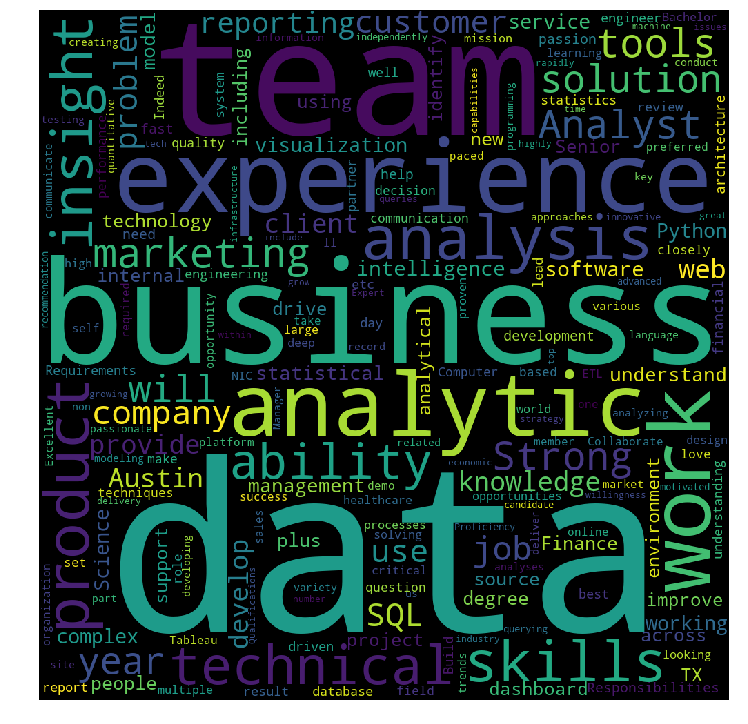

In [10]:
corpus_string = ''
for i in range(df.shape[0]):
    corpus_string = corpus_string + df.iloc[i]['description']

mycloud_2 = WordCloud(width=1000, height=1000,random_state=42,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

In [11]:
corpus_cleaned = corpus_string

corpus_list = corpus_cleaned.split(' ')
corpus_list = [PorterStemmer().stem(word) for word in corpus_list if word not in stop_words.ENGLISH_STOP_WORDS]
corpus_cleaned = ' '.join(corpus_list)
df_corp = pd.DataFrame(index=[0], columns=['text'])
df_corp.iloc[0,0] = corpus_cleaned

In [12]:
cvec = CountVectorizer()

df_cvec_description = cvec.fit_transform(df_corp['text']).todense()
df_cvec_description = pd.DataFrame(df_cvec_description, columns=cvec.get_feature_names())
df_cvec_description = df_cvec_description.T.reset_index()
df_cvec_description.columns = ['word', 'count']

In [13]:
df_cvec_description.sort_values(by='count', ascending=False)

,word,count
307,data,182
173,busi,66
1215,team,65
1341,work,59
467,experi,57
68,analyt,42
1352,you,35
964,product,34
346,develop,31
1294,use,30


In [56]:
corpus_dirty = corpus_string
corpus_list2 = corpus_dirty.split(' ')

corpus_dirty = ' '.join(corpus_list2)
df_corp2 = pd.DataFrame(index=[0], columns=['text'])
df_corp2.iloc[0,0] = corpus_dirty
cvec2 = CountVectorizer()

df_cvec_description2 = cvec2.fit_transform(df_corp2['text']).todense()
df_cvec_description2 = pd.DataFrame(df_cvec_description2, columns=cvec2.get_feature_names())
df_cvec_description2 = df_cvec_description2.T.reset_index()
df_cvec_description2.columns = ['word', 'count']

# Word Signifigance

## Reddit Corpus

In [18]:
df_reddit = pd.read_csv('../GA_Projects/project-3/Data/hbbPosts_9_04_A.csv') #warm start

In [22]:
for filepath in glob.iglob('../GA_Projects/project-3/Data/*'):
    if '_9_' not in filepath and 'Initial' not in filepath and 'the_donald7629' not in filepath and 'Republican58200' not in filepath:
        df_reddit = pd.concat([df_reddit, pd.read_csv(filepath)])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df_reddit.drop(['Unnamed: 0', 'selftext'], axis=1, inplace=True)

In [26]:
#df_reddit.to_csv('./Data/job_descriptions/corpuses/reddit_v1.csv')

In [27]:
cvec_reddit = CountVectorizer()

In [28]:
df_reddit_tr = cvec_reddit.fit_transform(df_reddit.title).todense()
df_reddit_tr = pd.DataFrame(df_reddit_tr, columns=cvec_reddit.get_feature_names())

In [33]:
lowcount = [col for col in df_reddit_tr if df_reddit_tr[col].sum()==1]

In [37]:
df_reddit_tr.drop(lowcount, axis=1, inplace=True)

In [39]:
for col in df_reddit_tr.columns:
    df_reddit_tr[col] = df_reddit_tr[col].sum()

In [45]:
counts_reddit = df_reddit_tr.iloc[0:1, :].T

In [49]:
freq_reddit = counts_reddit / counts_reddit.sum()

In [53]:
freq_reddit.columns=['global_frequency']

In [61]:
df_analysis = df_cvec_description2.join(freq_reddit, how='left', on=df_cvec_description2.word)

In [63]:
df_analysis.dropna(inplace=True)

In [64]:
df_analysis.columns

Index(['word', 'count', 'global_frequency'], dtype='object')

In [65]:
df_analysis['weight'] = df_analysis['count']/df_analysis['global_frequency']

In [72]:
df_analysis.sort_values(by='weight', ascending=False).iloc[:20, :]

,word,count,global_frequency,weight
365,data,182,0.000141,1.287119e+06
1121,product,25,0.000024,1.060812e+06
875,marketing,26,0.000035,7.354967e+05
412,develop,16,0.000024,6.789200e+05
1257,science,15,0.000024,6.364875e+05
924,models,13,0.000024,5.516225e+05
1403,technical,26,0.000047,5.516225e+05
1448,tools,25,0.000047,5.304062e+05
765,internal,12,0.000024,5.091900e+05
1308,skills,29,0.000059,4.922170e+05


In [70]:
df_cvec_description.sort_values(by='count', ascending=False).iloc[:20,:]

,word,count
307,data,182
173,busi,66
1215,team,65
1341,work,59
467,experi,57
68,analyt,42
1352,you,35
964,product,34
346,develop,31
1294,use,30


### Comparing with Clouds

In [73]:
import numpy as np

In [106]:
df_analysis['logfreq'] = np.log10(df_analysis.weight)*10
df_analysis['logfreq'] = df_analysis.logfreq.astype(int)

df_analysis_short = df_analysis.sort_values(by='weight', ascending=False).iloc[:100, :]

In [114]:
corp_st = '' 
for i in range(df_analysis_short.shape[0]):
    corp_st += (df_analysis_short.iloc[i,0] + ' ') * df_analysis_short.iloc[i,4] 

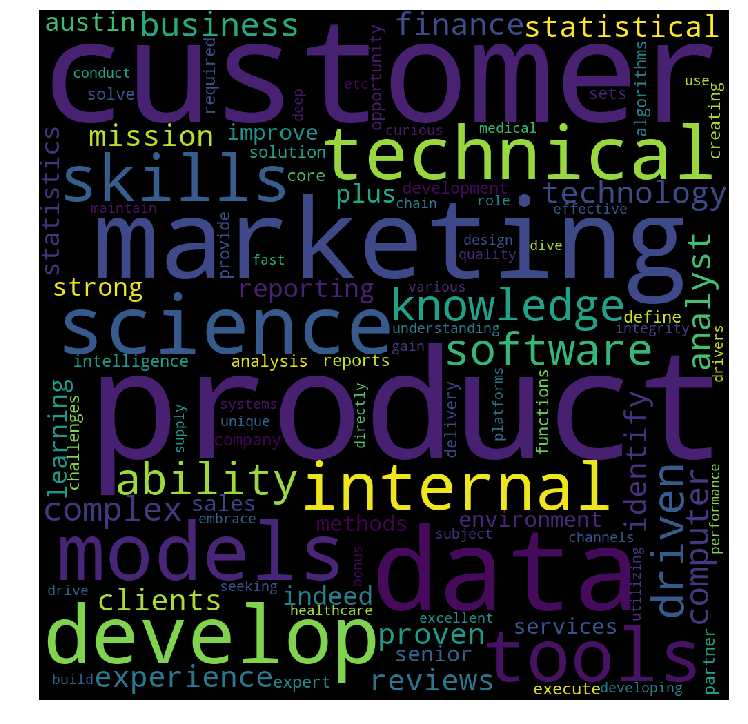

In [117]:
mycloud_3 = WordCloud(width=1000, height=1000,random_state=42,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corp_st)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_3)
plt.axis("off")
plt.tight_layout(pad = 0)

# Document Similarity

1. Create similarity matrix between existing corpus and new doc
2. Reduce dimensionality along strings (1 column vector of 1's)
3. Multiply by significance weight matrix (allows use of weights)
4. Rescore (sum total marix)
5. Normalize somehow?

Provide framework to remove older jobs from corpus
Once one job is selected to be removed, suggest othe jobs to be removed using same protocol
Aka, I'm tired of seeing this

Also provides framework for ranking mechanism more than just 'I applied' - allow say score of 1-3 on how much you want it
that translates back into normalization phase

## Wikipedia Corpus

In [128]:
"https://medium.com/@Alexander_H/scraping-wikipedia-with-python-8000fc9c9e6c"

'https://medium.com/@Alexander_H/scraping-wikipedia-with-python-8000fc9c9e6c'